## Exploratory Data Analysis On Titanic Dataset

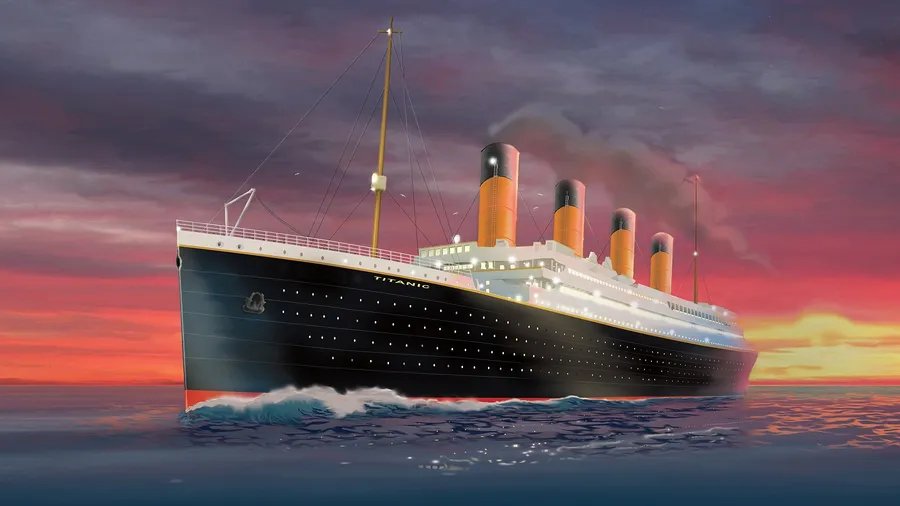

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data Set

In [2]:
data=pd.read_csv("titanic_train.csv")

In [3]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Clean The Data Set

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
age_median=data['Age'].median()
data['Age']=data['Age'].fillna(age_median)
data['Age'].isnull().sum()

0

In [35]:
data.drop('Cabin', axis=1, inplace=True)

In [42]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [44]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Distribution of Variables

#### A) Survived: Check survival rate

In [61]:
# Calculate the total number of passengers
total_passengers = len(data)

# Calculate the count and percentage for each survival status
survival_counts = data['Survived'].value_counts()
survival_percentages = (survival_counts / total_passengers) * 100

# Create a DataFrame for the percentages
survival_df = pd.DataFrame({
    'Survival Status': ['Not Survived', 'Survived'],
    'Percentage (%)': survival_percentages.values
})

print(survival_df)


  Survival Status  Percentage (%)
0    Not Survived       61.616162
1        Survived       38.383838


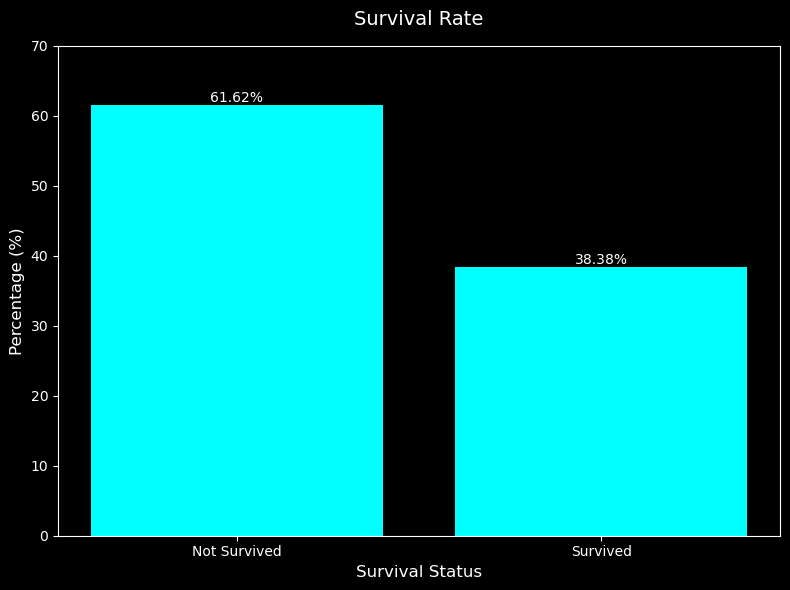

In [63]:
import matplotlib.pyplot as plt

# Set the figure style
plt.style.use('dark_background')  # To match the black background of your chart

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(survival_df['Survival Status'], survival_df['Percentage (%)'], color='cyan')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}%', ha='center', va='bottom')

# Customize the plot
plt.title('Survival Rate', fontsize=14, pad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Survival Status', fontsize=12)
plt.ylim(0, 70)  # Set y-axis limit to match your chart

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

#### Analysis: ~38% survived (1) and ~62% did not (0)

#### Age: Plot a histogram

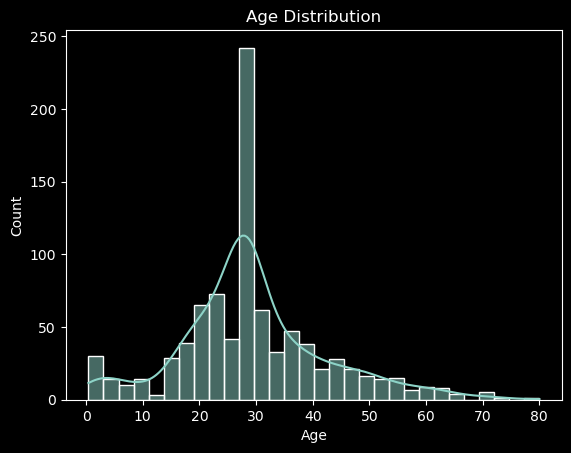

In [65]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

#### Analysis: Likely skewed right, with a peak around 20-30 years

#### Fare: Check distribution

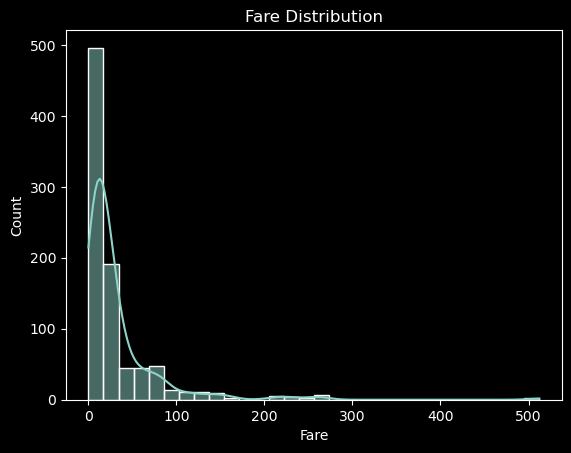

In [68]:
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

#### Pclass: Survival by passenger class

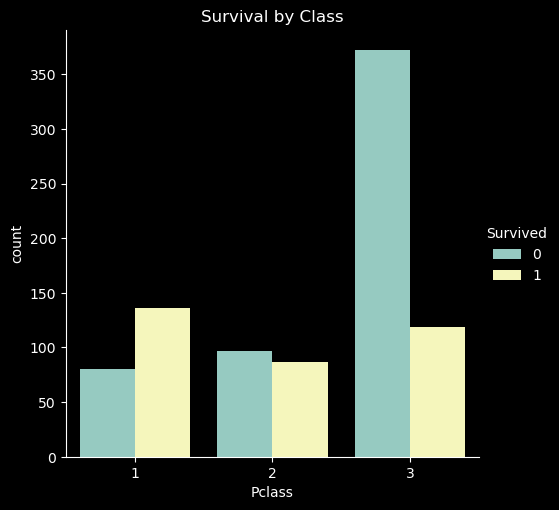

In [72]:
sns.catplot(x='Pclass', hue='Survived', kind='count', data=data)
plt.title('Survival by Class')
plt.show()

##### Analysis: higher survival in 1st class, lower in 3rd.

#### Sex: Survival by gender

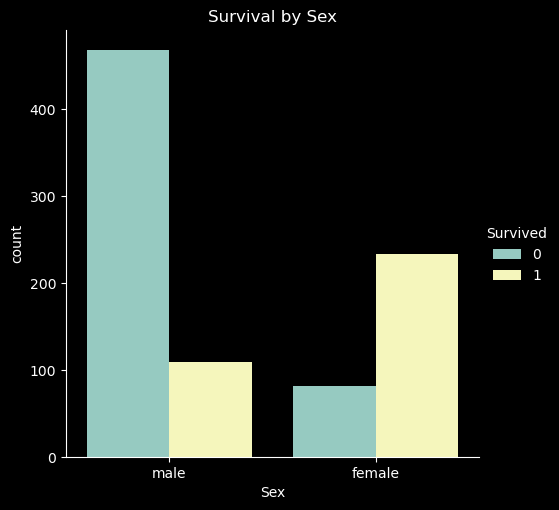

In [75]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=data)
plt.title('Survival by Sex')
plt.show()

##### Analysis: Females likely have a higher survival rate  and males are lower 

#### Survival by port of embarkation

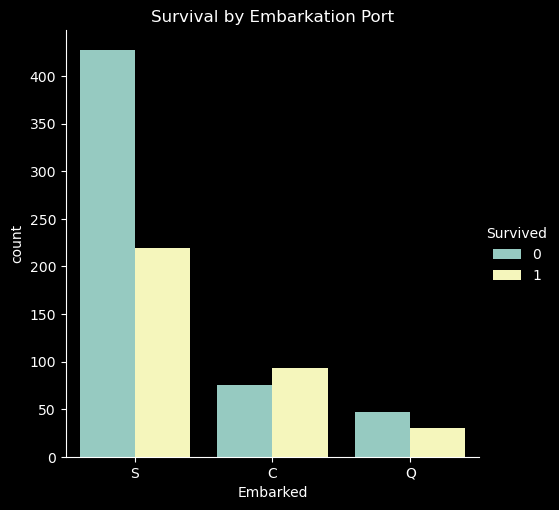

In [83]:
sns.catplot(x='Embarked', hue='Survived', kind='count', data=data)
plt.title('Survival by Embarkation Port')
plt.show()

#### Age vs. Survived: Boxplot to compare age distributions

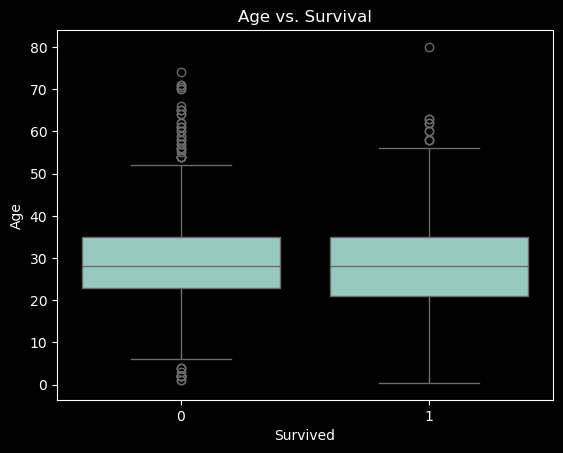

In [86]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs. Survival')
plt.show()

##### Analysis: Younger passengers might have a slight survival advantage

#### Fare vs. Pclass: Boxplot to see fare differences across classes.

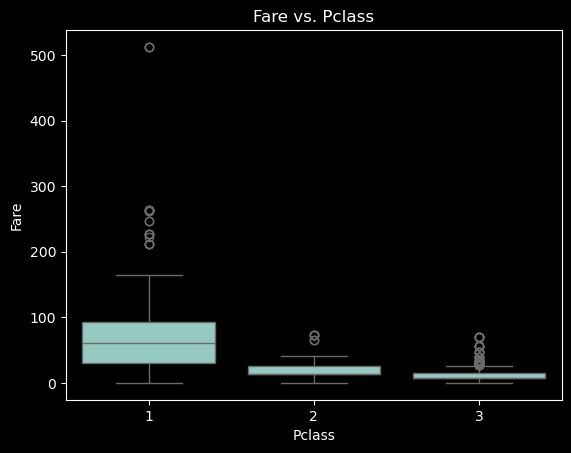

In [91]:
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare vs. Pclass')
plt.show()

#####  Analysis: 1st class fares are much higher than 3rd class.

## key patterns and trends :

### 1) Gender Impact: The pie chart shows a significant survival disparity between genders, with females having a much higher survival rate than males.

### 2) Social Class Influence: First-class passengers had the highest survival rate, followed by second-class, with third-class passengers having the lowest chance of survival, demonstrating how socioeconomic status affected survival outcomes

### 3) Age Patterns: The bar chart reveals that children had higher survival rates compared to adults, suggesting the "women and children first" protocol was followed during the disaster.

### 4) Embarkation Port Differences: Passengers who boarded at Cherbourg had better survival odds than those who boarded at Southampton or Queenstown, which might relate to differences in passenger demographics or cabin assignments.